# Import Database

In [322]:
import pandas as pd 
import re 
import matplotlib.pyplot as plt

In [ ]:
db = pd.read_csv('data/attacks.csv', encoding='latin-1')

## First Data Analysis

### Database Overview

In [8]:
db.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [9]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

### Investigating the utility of some columns

In [12]:
db[db['Unnamed: 23'].notnull()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
4415,1952.03.30,30-Mar-1952,1952.0,Unprovoked,NETHERLANDS ANTILLES,Curacao,NaN,Went to aid of child being menaced by the shark,A.J. Eggink,M,...,"Bull shark, 2.7 m [9'] was captured & dragged ...","J. Randall, p.352 in Sharks & Survival; H.D. B...",1952.03.30-Eggink.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.03.30,1952.03.30,1888.0,NaN,Teramo
5840,1878.09.14.R,Reported 14-Sep-1878,1878.0,Provoked,USA,Connecticut,"Branford, New Haven County",Fishing,Captain Pattison,M,...,NaN,"St. Joseph Herald, 9/14/1878",1878.09.14.R-Pattison.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1878.09.14.R,1878.09.14.R,463.0,NaN,change filename


In [24]:
case_case1 = db['Case Number'] == db['Case Number.1']
case_case1.value_counts() 

False    19445
True      6278
dtype: int64

In [26]:
db[~case_case1]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
34,2018.04.03,03-Apr-2018,2018.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,St. Francis Bay,Surfing,Ross Spowart,M,...,N,15h00,White shark,"K. McMurray, TrackingSharks.com",2018.04.03-StFrancisBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.04.02,2018.04.03,6269.0
117,2017.07.20.a,20-Jul-2017,2017.0,Unprovoked,USA,California,"Seal Rock, Goleta Beach, Santa Barbara",SUP,Rolf Geyling,M,...,N,07h45,"White shark, 8' to 10'","R. Collier, GSAF",2017.07.20.a-Geyling.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017/07.20.a,2017.07.20.a,6186.0
144,2017.05.06,05-May-2017,2017.0,Unprovoked,MEXICO,Baja California Sur,"Los Arbolitos, Cabo Pulmo",Snorkeling,Andres Rozada,M,...,Y,17h00,NaN,J. Rozada,2017.05.06-Rozada.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.06,2017.05.06,6159.0
217,2016.09.15,16-Sep-2016,2016.0,Unprovoked,AUSTRALIA,Victoria,Bells Beach,Surfing,male,M,...,N,NaN,2 m shark,"The Age, 9/16/2016",2016.09.16-BellsBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.16,2016.09.15,6086.0
314,2016.01.24.b,24-Jan-2016,2016.0,Unprovoked,USA,Texas,Off Surfside,Spearfishing,Keith Love,M,...,N,09h30 / 10h00,Bull sharks x 2,K. Love,2016.01.24.b-Love.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.01.24.b,2016.01.24.b,5989.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
db['original order'].value_counts()

569.0     2
5639.0    1
4754.0    1
2899.0    1
5259.0    1
         ..
439.0     1
257.0     1
4425.0    1
4065.0    1
6144.0    1
Name: original order, Length: 6308, dtype: int64

In [33]:
db['href'][0]

'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf'

In [34]:
db['href'][1]

'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.18-McNeely.pdf'

In [35]:
db['href'][2]

'http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.09-Denges.pdf'

In [36]:
href_formula = db['href'] == db['href formula']
href_formula.value_counts()

False    19481
True      6242
dtype: int64

In [38]:
href_null = db['href'].isnull()
href_null.value_counts()

True     19421
False     6302
Name: href, dtype: int64

### Evaluating null values throughout the whole database

In [57]:
null_mask = db.isnull().sum(axis=1)[db.isnull().sum(axis=1)>8]

In [58]:
db.loc[null_mask.index]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,href
6302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6303,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6304,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6305,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6306,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
db['Year'].value_counts()

2015.0    143
2017.0    136
2016.0    130
2011.0    128
2014.0    127
         ... 
1801.0      1
1638.0      1
1834.0      1
1723.0      1
1786.0      1
Name: Year, Length: 249, dtype: int64

### Evaluating numbers in the 'age' column

In [70]:
db['Age'].value_counts()

17              154
18              150
19              142
20              141
15              139
               ... 
(adult)           1
9 months          1
17 & 35           1
9 or 10           1
"middle-age"      1
Name: Age, Length: 157, dtype: int64

In [182]:
def isnum_pandas(number):
    len_num = re.findall('[^0-9][0-9]{1,2}', str(number))
    if len(len_num) > 0:
        if len(len_num[0]) > 2:
            return False
        else:
            return True
    else:
        return False
age_str = db.Age.apply(isnum_pandas)

In [184]:
db.Age[age_str].value_counts() 

7 or 8           2
2 to 3 months    1
Name: Age, dtype: int64

In [143]:
age_str

0        True
1        True
2        True
3       False
4       False
        ...  
6297    False
6298    False
6299    False
6300    False
6301     True
Name: Age, Length: 6302, dtype: bool

In [174]:
def del_str(value):
    len_num = re.findall('[0-9]{1,2}', str(value))
    value = len_num[0]
    return value

In [175]:
age_1 = db.Age[age_str]
age2 = age_1[del_str]

KeyError: '0'

In [ ]:
for mean_age

In [193]:
txt = '11'
test = re.findall('[^0-9]''[0-9]{1,2}', txt)
len(test)
len(test[0])
test
test = re.findall('[^0-9][0-9]{1,2}', txt)


IndexError: list index out of range

### Evaluating the date column

In [279]:
db2.loc[2, 'Date']

'09-Jun-2018'

In [ ]:
def return_month(d):
    date_input = re.findall('[a-zA-Z][a-zA-Z][a-zA-Z]', d)
    if len(date_input) == 1:
        return True
    

In [288]:
date_test = '09-Jun-2018'
date_test2 = re.findall('[a-zA-Z][a-zA-Z][a-zA-Z]', date_test)
len(date_test2)

1

# Data Cleaning

## Columns Drop

In [15]:
db = db.drop(columns=['Unnamed: 22', 'Unnamed: 23'])

In [42]:
db.head(3)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,href
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...


In [27]:
db = db.drop(columns=['Case Number.1', 'Case Number.2'])

In [30]:
db = db.drop(columns=['original order'])

In [39]:
db = db.drop(columns=['href formula'])

In [41]:
db = db.drop(columns=['pdf'])

## Drop null rows

In [64]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6301 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null   

In [65]:
db.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,href
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,http://sharkattackfile.net/spreadsheets/pdf_di...


In [59]:
db = db.drop(null_mask.index)

## Fixing Data Types

In [101]:
db.Year.astype(float)

0       2018.0
1       2018.0
2       2018.0
3       2018.0
4       2018.0
         ...  
6297       0.0
6298       0.0
6299       0.0
6300       0.0
6301       0.0
Name: Year, Length: 6302, dtype: float64

In [249]:
db2['New Age'] = db2['New Age'].astype(float)

<ipython-input-249-2491e47da78c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db2['New Age'] = db2['New Age'].astype(float)


## Fixing 'Age' Column

In [198]:
def return_num(value):
    value = str(value)
    return value[0:2]

In [199]:
db['New Age'] = db.Age.apply(return_num)

In [201]:
db['New Age'].value_counts()

na    2831
17     156
18     153
20     150
19     142
      ... 
>5       1
84       1
(a       1
X        1
MA       1
Name: New Age, Length: 110, dtype: int64

In [219]:
db['New Age'] = db['New Age'].map(lambda x: x.rstrip('½'))

In [210]:
def is_num(number):
    if number.isnumeric() == True:
        return True
    else:
        return False

In [235]:
mask_ages = db['New Age'].apply(is_num)

In [220]:
db['New Age'][test].value_counts()

17    156
18    153
20    150
19    142
16    139
     ... 
87      1
67      1
84      1
72      1
82      1
Name: New Age, Length: 81, dtype: int64

In [230]:
list_ages = db['New Age'][test].tolist()

In [247]:
db2 = db[mask_ages]

In [251]:
db2.describe()

,Year,New Age
count,3421.000000,3422.000000
mean,1977.010231,27.366745
std,126.162810,13.883917
min,0.000000,1.000000
25%,1964.000000,17.000000
50%,1996.000000,24.000000
75%,2009.000000,35.000000
max,2018.000000,87.000000


In [252]:
db2.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,href,New Age
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,57.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,11.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,48.0
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",http://sharkattackfile.net/spreadsheets/pdf_di...,18.0
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,52.0


## Fixing the year column

In [253]:
list_ages = db2['Year'].tolist()

In [255]:
set(list_ages)

{nan,
 0.0,
 1703.0,
 1749.0,
 1817.0,
 1828.0,
 1830.0,
 1837.0,
 1839.0,
 1842.0,
 1847.0,
 1848.0,
 1852.0,
 1855.0,
 1856.0,
 1858.0,
 1859.0,
 1862.0,
 1863.0,
 1864.0,
 1865.0,
 1868.0,
 1870.0,
 1871.0,
 1873.0,
 1875.0,
 1877.0,
 1878.0,
 1879.0,
 1880.0,
 1881.0,
 1883.0,
 1886.0,
 1887.0,
 1888.0,
 1890.0,
 1892.0,
 1894.0,
 1895.0,
 1896.0,
 1898.0,
 1899.0,
 1900.0,
 1901.0,
 1902.0,
 1903.0,
 1904.0,
 1905.0,
 1906.0,
 1907.0,
 1908.0,
 1909.0,
 1911.0,
 1912.0,
 1913.0,
 1914.0,
 1915.0,
 1916.0,
 1918.0,
 1919.0,
 1920.0,
 1921.0,
 1922.0,
 1923.0,
 1924.0,
 1925.0,
 1926.0,
 1927.0,
 1928.0,
 1929.0,
 1930.0,
 1931.0,
 1932.0,
 1933.0,
 1934.0,
 1935.0,
 1936.0,
 1937.0,
 1938.0,
 1939.0,
 1940.0,
 1941.0,
 1942.0,
 1943.0,
 1944.0,
 1945.0,
 1946.0,
 1947.0,
 1948.0,
 1949.0,
 1950.0,
 1951.0,
 1952.0,
 1953.0,
 1954.0,
 1955.0,
 1956.0,
 1957.0,
 1958.0,
 1959.0,
 1960.0,
 1961.0,
 1962.0,
 1963.0,
 1964.0,
 1965.0,
 1966.0,
 1967.0,
 1968.0,
 1969.0,
 1970.0,
 1971.0

In [260]:
old_cases = db2.loc[(db2['Year'] > 1703) & (db2['Year'] < 1920),'href']

In [264]:
pd.set_option('display.max_colwidth', -1)
old_cases

<ipython-input-264-02c51245184e>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


5263    http://sharkattackfile.net/spreadsheets/pdf_directory/1919.12.30.R-Brothy.pdf    
5264    http://sharkattackfile.net/spreadsheets/pdf_directory/1919.12.07-Ridley.pdf      
5273    http://sharkattackfile.net/spreadsheets/pdf_directory/1919.01.09-Simpson.pdf     
5274    http://sharkattackfile.net/spreadsheets/pdf_directory/1919.01.05-Hoey.pdf        
5279    http://sharkattackfile.net/spreadsheets/pdf_directory/1918.09.19-Bartlett.pdf    
                                            ...                                          
6077    http://sharkattackfile.net/spreadsheets/pdf_directory/1837.01.17-Howe.pdf        
6089    http://sharkattackfile.net/spreadsheets/pdf_directory/1830.07.26-JosephBlaney.pdf
6096    http://sharkattackfile.net/spreadsheets/pdf_directory/1828.09.28-Corrigle.pdf    
6114    http://sharkattackfile.net/spreadsheets/pdf_directory/1817.05.11-May.pdf         
6152    http://sharkattackfile.net/spreadsheets/pdf_directory/1749.00.00-Watson.pdf      
Name: href

In [265]:
db2.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,href,New Age
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and paddle damaged",N,18h00,White shark,"R. Collier, GSAF",http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf,57.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.18-McNeely.pdf,11.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.09-Denges.pdf,48.0
6,2018.06.03.a,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,Y,Late afternoon,Tiger shark,"Diario de Pernambuco, 6/4/2018",http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.03.a-daSilva.pdf,18.0
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,M,52,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'","K. McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_directory/2018.05.27-Ponce.pdf,52.0


In [266]:
db2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3422 entries, 0 to 6301
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             3422 non-null   object 
 1   Date                    3422 non-null   object 
 2   Year                    3421 non-null   float64
 3   Type                    3421 non-null   object 
 4   Country                 3413 non-null   object 
 5   Area                    3305 non-null   object 
 6   Location                3274 non-null   object 
 7   Activity                3288 non-null   object 
 8   Name                    3411 non-null   object 
 9   Sex                     3387 non-null   object 
 10  Age                     3422 non-null   object 
 11  Injury                  3417 non-null   object 
 12  Fatal (Y/N)             3201 non-null   object 
 13  Time                    2335 non-null   object 
 14  Species                 2168 non-null   

## Keeping only the columns that I'll work with it

In [267]:
db2 = db2.drop(columns=['Case Number', 'Age', 'Investigator or Source'])

In [269]:
db2 = db2.rename(columns={'New Age': 'Age'})

In [276]:
db2 = db2.rename(columns={'Type': 'Accident Type', 'href': 'Accident Link'})

In [271]:
db2.columns

Index(['Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Sex ', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ', 'href',
       'Age'],
      dtype='object')

In [277]:
db2 = db2[['Date', 'Year', 'Accident Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Age', 'Sex ', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ', 'Accident Link']]

In [278]:
db2.head()

,Date,Year,Accident Type,Country,Area,Location,Activity,Name,Age,Sex,Injury,Fatal (Y/N),Time,Species,Accident Link
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,57.0,F,"No injury to occupant, outrigger canoe and paddle damaged",N,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,11.0,F,Minor injury to left thigh,N,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.18-McNeely.pdf
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,48.0,M,Injury to left lower leg from surfboard skeg,N,07h45,NaN,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.09-Denges.pdf
6,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,18.0,M,FATAL,Y,Late afternoon,Tiger shark,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.03.a-daSilva.pdf
7,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,52.0,M,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'",http://sharkattackfile.net/spreadsheets/pdf_directory/2018.05.27-Ponce.pdf


## Manipulating the month column

In [294]:
def ret_month(d):
    dat = re.findall('[a-zA-Z][a-zA-Z][a-zA-Z]', d)
    if len(dat) == 1:
        return dat[0]
    else:
        return 'NaN'

In [295]:
db2['Month'] = db2['Date'].apply(ret_month)

In [296]:
db2.head()

,Date,Year,Accident Type,Country,Area,Location,Activity,Name,Age,Sex,Injury,Fatal (Y/N),Time,Species,Accident Link,Month
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,57.0,F,"No injury to occupant, outrigger canoe and paddle damaged",N,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf,Jun
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,11.0,F,Minor injury to left thigh,N,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.18-McNeely.pdf,Jun
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,48.0,M,Injury to left lower leg from surfboard skeg,N,07h45,NaN,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.09-Denges.pdf,Jun
6,03-Jun-2018,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,18.0,M,FATAL,Y,Late afternoon,Tiger shark,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.03.a-daSilva.pdf,Jun
7,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,52.0,M,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'",http://sharkattackfile.net/spreadsheets/pdf_directory/2018.05.27-Ponce.pdf,May


In [297]:
db2 = db2.drop(columns=['Date'])

In [298]:
db2.columns

Index(['Year', 'Accident Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Age', 'Sex ', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ',
       'Accident Link', 'Month'],
      dtype='object')

In [300]:
db2 = db2[['Month', 'Year', 'Accident Type', 'Country', 'Area', 'Location', 'Activity',
       'Name', 'Age', 'Sex ', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ',
       'Accident Link']]

In [301]:
db2.head()

,Month,Year,Accident Type,Country,Area,Location,Activity,Name,Age,Sex,Injury,Fatal (Y/N),Time,Species,Accident Link
0,Jun,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,57.0,F,"No injury to occupant, outrigger canoe and paddle damaged",N,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf
1,Jun,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,11.0,F,Minor injury to left thigh,N,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.18-McNeely.pdf
2,Jun,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,48.0,M,Injury to left lower leg from surfboard skeg,N,07h45,NaN,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.09-Denges.pdf
6,Jun,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,18.0,M,FATAL,Y,Late afternoon,Tiger shark,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.03.a-daSilva.pdf
7,May,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,52.0,M,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'",http://sharkattackfile.net/spreadsheets/pdf_directory/2018.05.27-Ponce.pdf


In [302]:
db2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3422 entries, 0 to 6301
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          3422 non-null   object 
 1   Year           3421 non-null   float64
 2   Accident Type  3421 non-null   object 
 3   Country        3413 non-null   object 
 4   Area           3305 non-null   object 
 5   Location       3274 non-null   object 
 6   Activity       3288 non-null   object 
 7   Name           3411 non-null   object 
 8   Age            3422 non-null   float64
 9   Sex            3387 non-null   object 
 10  Injury         3417 non-null   object 
 11  Fatal (Y/N)    3201 non-null   object 
 12  Time           2335 non-null   object 
 13  Species        2168 non-null   object 
 14  Accident Link  3422 non-null   object 
dtypes: float64(2), object(13)
memory usage: 587.8+ KB


## Keeping records of only the last 20 years

In [315]:
year_indexes = db2[(db2['Year'] > 1702) & (db2['Year'] < 2001)].index 

In [316]:
db2 = db2.drop(year_indexes)

In [317]:
db2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1481 entries, 0 to 6301
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          1481 non-null   object 
 1   Year           1480 non-null   float64
 2   Accident Type  1480 non-null   object 
 3   Country        1480 non-null   object 
 4   Area           1441 non-null   object 
 5   Location       1432 non-null   object 
 6   Activity       1441 non-null   object 
 7   Name           1474 non-null   object 
 8   Age            1481 non-null   float64
 9   Sex            1476 non-null   object 
 10  Injury         1481 non-null   object 
 11  Fatal (Y/N)    1381 non-null   object 
 12  Time           1174 non-null   object 
 13  Species        985 non-null    object 
 14  Accident Link  1481 non-null   object 
dtypes: float64(2), object(13)
memory usage: 225.1+ KB


## Creating Quarter column

In [339]:
def quarter(m):
    if m == 'Jan' or m == 'Feb' or m == 'Mar':
        return 'Q1'
    elif m == 'Apr' or m == 'May' or m == 'Jun':
        return 'Q2'
    elif m == 'Jul' or m == 'Aug' or m == 'Sep':
        return 'Q3'
    elif m == 'Oct' or m == 'Nov' or m == 'Dec':
        return 'Q4'
    else:
        return 'NaN'

In [341]:
db2['Quarter'] = db2['Month'].apply(quarter)
db2.head(3)

,Month,Year,Accident Type,Country,Area,Location,Activity,Name,Age,Sex,Injury,Fatal (Y/N),Time,Species,Accident Link,Quarter
0,Jun,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,57.0,F,"No injury to occupant, outrigger canoe and paddle damaged",N,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf,Q2
1,Jun,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,11.0,F,Minor injury to left thigh,N,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.18-McNeely.pdf,Q2
2,Jun,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,48.0,M,Injury to left lower leg from surfboard skeg,N,07h45,NaN,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.09-Denges.pdf,Q2


In [342]:
db2.columns

Index(['Month', 'Year', 'Accident Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Age', 'Sex ', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Accident Link', 'Quarter'],
      dtype='object')

In [343]:
db2 = db2[['Month', 'Quarter', 'Year', 'Accident Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Age', 'Sex ', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ']]

# Analyzing Data

## Analysis by quarter

In [361]:
quarter_list = ['Q1', 'Q2', 'Q3', 'Q4']

In [349]:
quarter_test = db2['Quarter'].value_counts()

In [364]:
quarter_values = []
for i in quarter_list:
    value = quarter_test.loc[quarter_test.index.isin([i])]
    quarter_values.append(value.item())

In [365]:
quarter_values

[247, 412, 472, 295]

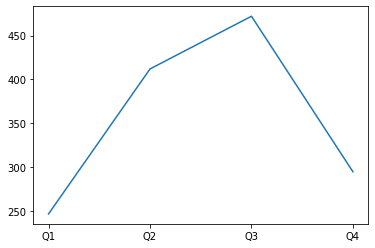

In [366]:
plt.plot(quarter_list, quarter_values)
plt.show()

## Analysis by year

In [319]:
db2['Year'].value_counts() 

2015.0    117
2016.0    99 
2012.0    97 
2011.0    96 
2013.0    94 
2008.0    91 
2017.0    89 
2009.0    82 
2007.0    82 
2006.0    80 
2014.0    79 
2002.0    77 
2005.0    74 
2010.0    72 
2003.0    70 
2001.0    66 
2004.0    63 
2018.0    39 
0.0       13 
Name: Year, dtype: int64

In [320]:
db2['Activity'].value_counts() 

Surfing                       488
Swimming                      220
Spearfishing                  78 
Wading                        67 
Snorkeling                    54 
                              .. 
Fishing - 'tag & release'     1  
Swimming & snorkeling         1  
Standing, stepped on shark    1  
Swimming or surfing           1  
Tagging sharks                1  
Name: Activity, Length: 224, dtype: int64

In [321]:
db2['Country'].value_counts() 

USA               762
AUSTRALIA         267
SOUTH AFRICA      98 
BRAZIL            49 
BAHAMAS           37 
                  .. 
CANADA            1  
CAYMAN ISLANDS    1  
CAPE VERDE        1  
INDIA             1  
SAMOA             1  
Name: Country, Length: 80, dtype: int64

In [307]:
db2 = db2.drop(columns=['Month-Year'])

In [309]:
db2.head()

,Month,Year,Accident Type,Country,Area,Location,Activity,Name,Age,Sex,Injury,Fatal (Y/N),Time,Species,Accident Link
0,Jun,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,57.0,F,"No injury to occupant, outrigger canoe and paddle damaged",N,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.25-Wolfe.pdf
1,Jun,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,11.0,F,Minor injury to left thigh,N,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.18-McNeely.pdf
2,Jun,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,48.0,M,Injury to left lower leg from surfboard skeg,N,07h45,NaN,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.09-Denges.pdf
6,Jun,2018.0,Unprovoked,BRAZIL,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,18.0,M,FATAL,Y,Late afternoon,Tiger shark,http://sharkattackfile.net/spreadsheets/pdf_directory/2018.06.03.a-daSilva.pdf
7,May,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,male,52.0,M,Minor injury to foot. PROVOKED INCIDENT,N,NaN,"Lemon shark, 3'",http://sharkattackfile.net/spreadsheets/pdf_directory/2018.05.27-Ponce.pdf


In [310]:
month_groups = db2.groupby(by='Month')

In [314]:
db2.groupby(by='Year').describe()

Age                                                    
        count       mean        std   min   25%   50%   75%   max
Year                                                             
0.0     13.0   21.461538  11.296130  6.0   15.0  19.0  25.0  50.0
1703.0  1.0    19.000000 NaN         19.0  19.0  19.0  19.0  19.0
1749.0  1.0    14.000000 NaN         14.0  14.0  14.0  14.0  14.0
1817.0  1.0    22.000000 NaN         22.0  22.0  22.0  22.0  22.0
1828.0  1.0    17.000000 NaN         17.0  17.0  17.0  17.0  17.0
...     ...          ...  ..          ...   ...   ...   ...   ...
2014.0  79.0   29.898734  15.233730  7.0   17.0  29.0  42.0  66.0
2015.0  117.0  31.076923  16.679615  6.0   18.0  28.0  43.0  71.0
2016.0  99.0   34.444444  17.639371  6.0   20.0  34.0  45.5  73.0
2017.0  89.0   30.921348  16.429757  3.0   18.0  28.0  40.0  82.0
2018.0  39.0   32.102564  16.239644  10.0  18.0  32.0  43.0  69.0

[158 rows x 8 columns]